# 1 Sampling
# 1.1 Sampling random points within D- dimensional domains by hit and miss
Generate random points uniformly distributed within a rectangle [a, b] x [c, d] and compare the analytic value of the area $A = |ab| \cdot |cd|$ with the Monte Carlo estimate based on the hit-miss method as a function of the number of "throws".

##### Rectangle 
For the rectangle, we generate points $(x, y)$ with coordinates $x$, $y$ that are uniformly distributed random numbers within the larger rectangle, where $x \sim U(A, B)$ and $y \sim U(C, D)$. The ratio between points falling inside the smaller rectangle and the total number of points generated provides an estimate of the area of the smaller rectangle.

<img src="2_1.png" style="height:300px" />

The analytic area of the small rectangle is: 1 <br>
The Monte Carlo estimate based on the hit-miss varying the number of samples is showed in the plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

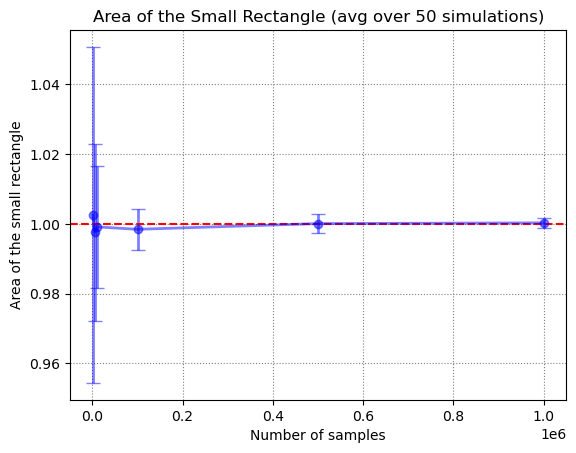

In [2]:
data = np.loadtxt("1.1_rect.txt")

plt.errorbar(data[:, 0], data[:, 1], yerr=data[:, 2], fmt='o-', color='blue', linewidth=2, alpha=0.5, capsize=5)
plt.xlabel('Number of samples')
plt.ylabel('Area of the small rectangle')
plt.grid(color='grey', linestyle='dotted')
plt.axhline(y=1, color='red', linestyle='--', label="y = 1")
plt.title('Area of the Small Rectangle (avg over 50 simulations)')
plt.show()

Note that as the samples are chosen randomly, there is significant variability in the plot's outcome each time the program is executed. To enhance the results, I try to run the process multiple times and then calculate the average outcome. For exemple this was the outcome with 50 runs.

##### Disk 
For the disk, we apply the same logic: we generate points inside a square in the first quadrant $[0,1] x [0,1]$ that contains a quarter of the disk, and then we apply the condition for belonging to the disk, which is $x^2 + y^2 \leq 1$. The ratio of points that satisfy this equation to the total number of samples provides an estimate of the quarter of the area of the disk.
<img src="2_1b.png" style="height:300px" />

The analytic area of the circle is: 3.14159<br>
The Monte Carlo estimate based on the hit-miss varying the number of samples and averaging the results in 50 runs is shown below.<br>

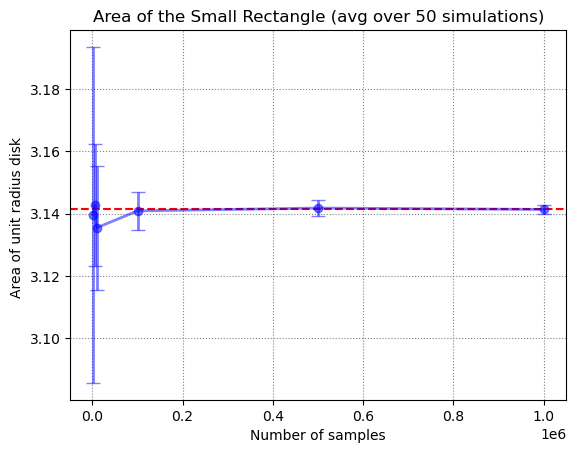

In [3]:
data = np.loadtxt("1.1_disk.txt")

plt.errorbar(data[:, 0], data[:, 1], yerr=data[:, 2], fmt='o-', color='blue', linewidth=2, alpha=0.5, capsize=5)
plt.xlabel('Number of samples')
plt.ylabel('Area of unit radius disk ')
plt.grid(color='grey', linestyle='dotted')
plt.axhline(y=np.pi, color='red', linestyle='--', label="y = 1")
plt.title('Area of the Small Rectangle (avg over 50 simulations)')
plt.show()

# Sampling random numbers from a given distribution
# 1.2 Inversion method

Use the inversion method to design an algorithm that samples random numbers according to the
power law probability distribution
$\rho (x) = c x^n $, with x in [0, 1].

First, calculate the Cumulative Distribution Function (CDF) of the given distribution. The CDF is given by:
$CDF =\int_0^k c x^n \, dx = \frac{c k^{n+1}}{n+1} $

The CDF represents the cumulative probability up to 'k'.
Now, to ensure that the probability distribution is properly normalized (i.e., the area under the curve equals 1), we need to determine the value of the constant 'c'. We do this for two different values of 'n'.

$n=3 \rightarrow \int_0^1 c x^3 \, dx = \frac{c}{4} = 1 \rightarrow c=4$

$n=4 \rightarrow \int_0^1 c x^4 \, dx = \frac{c}{5} = 1 \rightarrow c=5$

Now, we want to sample random numbers from this distribution. To do this, we use the inverse CDF method. We set the CDF equal to a random number 'u' sampled from a uniform distribution between 0 and 1; then we solve for 'k' to obtain samples from the pdf $\rho$:

$\frac{c k^{n+1}}{n+1} = u \rightarrow k = \sqrt[n+1]{u\frac{n+1}{c}}, \quad u \sim U(0,1)$

In [4]:
def power (x, n, c):
    return c*x**(n)

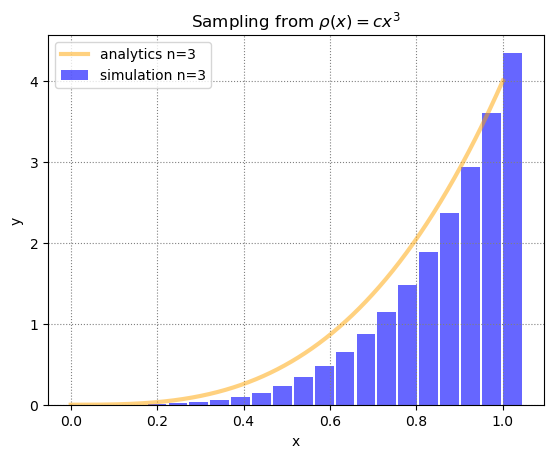

In [5]:
n = 3
c = 4

# Load simulation results
x_sim = np.loadtxt("sampl_1.2.txt")

# Compute the analytic curve
x = np.linspace(0,1,len(x_sim))
y = power(x, n, c)

# Plot
plt.plot(x,y, '-', label = 'analytics n=3', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation n=3', bins=20, histtype='barstacked', rwidth=0.9, color = 'blue', alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^3 $')
plt.legend()
plt.show()

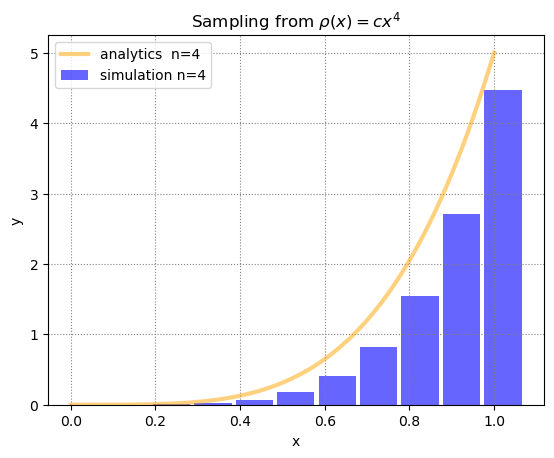

In [6]:
n = 4
c = 5

#simulation
x_sim = np.loadtxt("sampl_1.2b.txt")

#analytics
x = np.linspace(0,1,len(x_sim))
y = power(x, n, c)

plt.plot(x,y, '-', label = 'analytics  n=4', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation n=4', bins=10, histtype='barstacked', rwidth=0.9, color = 'blue', alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^4 $')
plt.legend()
plt.show()

# 1.3 Inversion method II

Use the inversion method to design an algorithm that samples random numbers according to the
power law probability distribution
$\rho (x) = c x^n $, with x in [0, 2].

To solve this task we considered n=2 and we used the same logic as before except of changing the normalization constant.

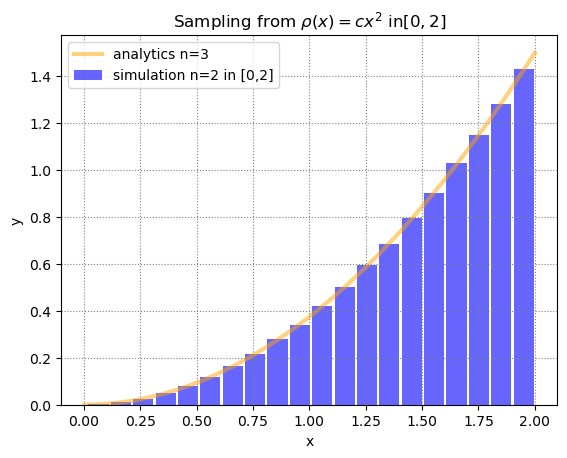

In [7]:
n = 2
c = 3/8

#simulation
x_sim = np.loadtxt("sampl_1.3.txt")

#analytics
x = np.linspace(0,2,len(x_sim))
y = power(x, n, c)

plt.plot(x,y, '-', label = 'analytics n=3', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation n=2 in [0,2]', bins=20, histtype='barstacked', rwidth=0.9, color = 'blue', alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^2$ in$ [0,2] $')
plt.legend()
plt.show()

# 1.4 Additional exercises
# 1.4.1
Use the inversion method to design an algorithm that samples random numbers according to the following probability distribution:

$\rho (x) = \mu e^{-\mu x} $, with x in [0, Infinity]

First, calculate the Cumulative Distribution Function (CDF) of the given distribution. The CDF is defined as:

$CDF = \int_0^j {\mu} e^{-{\mu} x} \, dx = 1-e^{-j {\mu}}$

Now, we want to sample random numbers from this distribution. To do this, we use the inverse CDF method. We set the CDF equal to a random number 'u' sampled from a uniform distribution between 0 and 1; then we solve for 'j' to obtain:


$1-e^{-j {\mu}} = u \rightarrow j = \frac{Log(1-u)}{\mu}, \quad u \sim U(0,1)$

In [8]:
def exp1 (x, mu):
    return mu*np.exp(-mu*x)

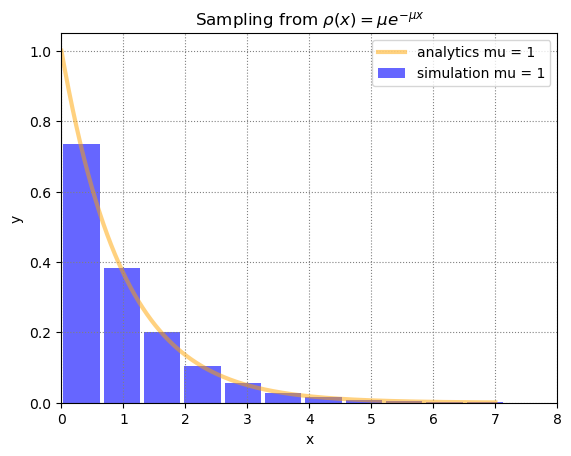

In [9]:
mu = 1.

#simulation
x_sim = np.loadtxt("sampl_1.4.1.txt")

#analytics
x = np.linspace(0,7,len(x_sim))
y = exp1(x, mu)

plt.plot(x,y, '-', label = 'analytics mu = 1', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, bins=25, histtype='barstacked', rwidth=0.9, label = 'simulation mu = 1', color = 'blue', alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,8)
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = \mu e^{-\mu x} $')
plt.legend()
plt.show()

### 1.4.2

Use the inversion method to design an algorithm that samples random numbers according to the following probability distribution:

$\rho (x) = 2x e^{- x^2} $, with x in $[0, \infty]$.

$CDF = \int_0^j 2x e^{- x^2} \, dx = 1-e^{-j^2}$.

$1-e^{-j^2} = u \rightarrow j = \sqrt{\frac{1}{Log(1-u)}}, \quad u \sim U(0,1)$.

In [10]:
def exp2 (x):
    return 2*x*np.exp(-x**2)

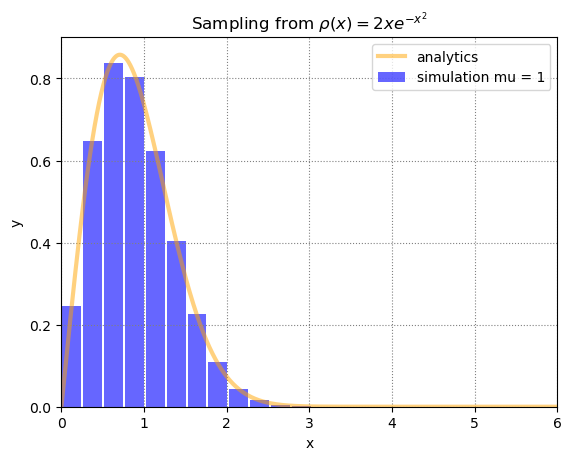

In [11]:
#simulation
x_sim = np.loadtxt("sampl_1.4.2.txt")

#analytics
x = np.linspace(0,7,len(x_sim))
y = exp2(x)

plt.plot(x,y, '-', label = 'analytics', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim,bins=15, histtype='barstacked', rwidth=0.9, label = 'simulation mu = 1', color = 'blue', alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,6)
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) =  2x e^{- x^2} $')
plt.legend()
plt.show()

### 1.4.3  

Use the inversion method to design an algorithm that samples random numbers according to the following probability distribution:

$\rho (x) = \frac{1}{(a+bx)^n} $, with x in $[0, \infty]$ and n > 1


The normalization condition is obtained by integrating the function over the entire domain:

$\int_0^{\infty } (a+b x)^{-n} \, dx = \frac{a^{1-n}}{b (n-1)}\overset{!}{=}1.$


A possible choice for $(a, b)$ that satisfies the normalization condition is: $\quad \left\{
\begin{aligned}
& \text{a = 1,} \\
& \text{b = $\frac{1}{n-1}$.}
\end{aligned}
\right.
$


The cumulative density function is given by:

$CDF = \int_0^j \frac{1}{(a+bx)^n} \, dx =  \int_0^j \left(\frac{x}{n-1}+1\right)^{-n}  dx = 1-\left(\frac{j+n-1}{n-1}\right)^{1-n} $

$1-\left(\frac{j+n-1}{n-1}\right)^{1-n} = u \rightarrow j=(n-1)\left((1-u)^{\frac{1}{1-n}}-1\right)$

##### n  = 3 

Let us consider for exemple the case in wich n=3 and let us fix as before the parameters $(a,b)$ to 1 and 1/(n-1) = 1 respectivly:

$\rho (x) = \frac{a b}{(a+b x)^2} $

$CDF = 1-\left(\frac{j+n-1}{n-1}\right)^{1-n}  \quad\quad j\to 2((1-u)^{-\frac{1}{2}}-1) $

In [35]:
def exp3 (x, a,b,n):
    return 1/(a+b*x)**n

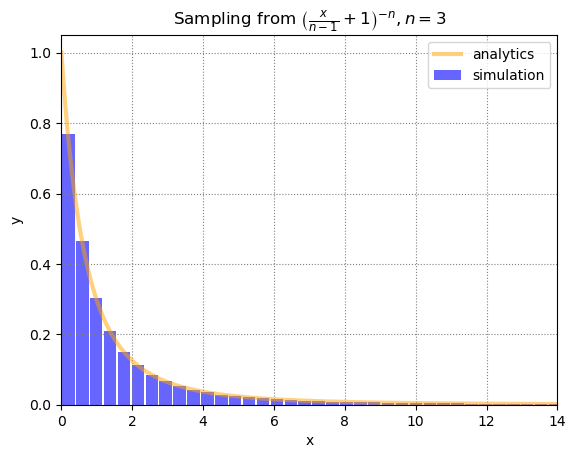

In [56]:
#simulation
n = 3
a = 1.  
b = 1./(n-1)

x_sim = np.loadtxt("sampl_1.4.3.txt")

#analytics
x = np.linspace(0,20,len(x_sim))
y = exp3(x,a,b,n)

plt.plot(x,y, '-', label = 'analytics', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, histtype='bar', rwidth=0.9, label = 'simulation', color = 'blue', bins=20000, alpha=0.6,density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,14)
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\left(\frac{x}{n-1}+1\right)^{-n}, n=3$')
plt.legend()
plt.show()

# 2 Sampling via transformation of coordinates

## 2.1 Sampling uniformly points within a unit radius disk
We want to sample points within a unit disk by setting r as a constant equal to 1 and θ (angle) as a random variable uniformly distributed between 0 and 2π. To do this, the following approach is used:

    - Generate a random angle θ uniformly distributed between 0 and 2π.

    - Set r to a constant value of 1 since you want to sample points within a unit disk.

    - Convert the polar coordinates (r and θ) to Cartesian coordinates (x and y) using the following equations:
        - x = r * cos(θ)
        - y = r * sin(θ)
        
The described algorithm, where we sample r from a uniform distribution between 0 and 1 and θ from a uniform distribution between 0 and 2π, will not sample points uniformly within the unit disk. <br>
The conceptual mistake here is that points with a larger r (i.e., closer to the edge of the square) will be sampled with the same frequency as points with a smaller r (i.e., closer to the center). However, in a unit circle, points closer to the center should be sampled less densely than points near the edge because there is more area to cover closer to the edges. <br>
As one can infer from the following plot, the points near the center of the circle are overrepresented, confirming that this method does not sample points uniformly within the unit disk. 

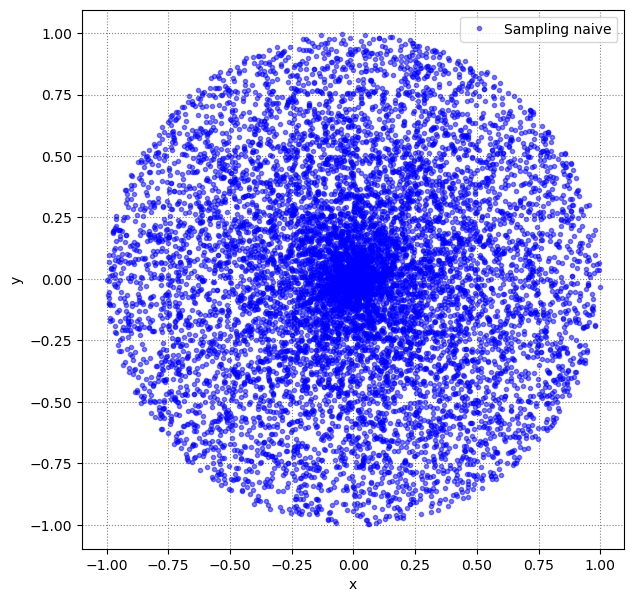

In [14]:
data = np.loadtxt("disk_sampl_2.1.txt")
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Sampling naive', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

As we mentioned above, to sample points uniformly within a unit disk, one need to account for the varying area of each concentric circle within the disk. Points closer to the center should be sampled less densely because they represent a smaller area.<br>
We want the proportion of points to be uniformly proportional to area rather than distance to the origin.

$$
\rho (x, y)dxdy = \frac{1}{{\pi R^2}}  \, dx \, dy =  \frac{1}{{\pi}}  \, dx \, dy.
$$

Let us compute the Jacobian of the transformation from (x, y) to (r, θ):

$$
J = \begin{vmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{vmatrix}
= \begin{vmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{vmatrix}
= r(\cos^2(\theta) + \sin^2(\theta)) = r
$$
<br>

If we pass into polar coordinates the PDF becomes: 

$$
\rho (r,\theta)\, dr \, d\theta = \rho (x, y)\cdot r \, dx \, dy = \frac{r}{{\pi}}  \, dr \, d\theta.
$$

We marginalize (meaning integrate) over $\theta$ to compute $\rho (r)$ and we draw a sample from it using standard 1D techniques:
$$
\rho (r) = \int_0^{2\pi} \rho (r,\theta) \, d\theta = \int_0^{2\pi} \frac{r}{{\pi}} d\theta = 2r dr
$$
$$
CDF(r) = \int_0^{a} \rho (r) dr = \int_0^{a}2r dr = a^2  \\
a^2 = u_1 \rightarrow a = \sqrt{u_1}  \quad\quad \left\{ 
\begin{array}{ll} 
u_1 \sim U(0,1)\\
a \sim \rho (r)\end{array}\right.
$$

Then we compute the conditional probability $\rho(\theta | r)$ and we draw a sample from it:  $$
\rho (\theta | r) = \frac{\rho(\theta,r)}{\rho(r)} = \frac{1}{2 \pi}
$$
$$
CDF(\theta | r) = \int_0^{b} \rho (\theta | r) d\theta = \int_0^{b}\frac{1}{2 \pi} d\theta = \frac{1}{2 \pi} b  \\
\frac{1}{2 \pi} b = u_2 \rightarrow b = 2 \pi u_2  \quad\quad \left\{ 
\begin{array}{ll} 
u_2 \sim U(0,1)\\
b \sim \rho (\theta | r)\end{array}\right.
$$

We can conclude that the right sampling from a unit radius disk is: 
$$
x =  \sqrt{u_1} cos(2\pi u_2 ) \\
y =  \sqrt{u_1} sin(2\pi u_2 )
$$

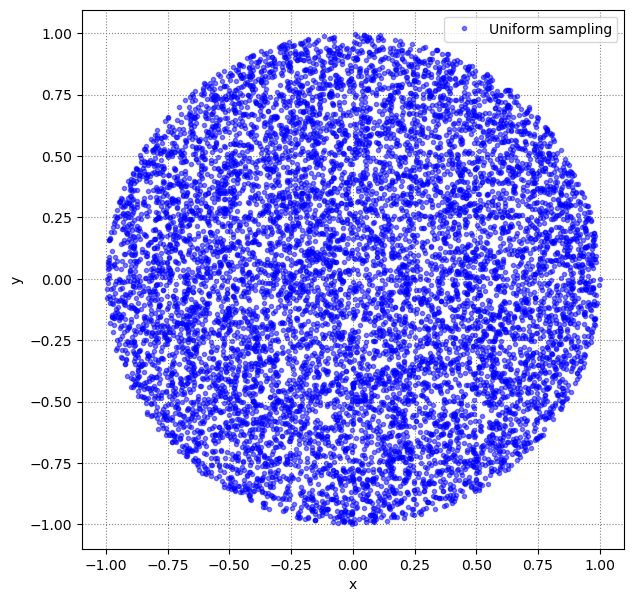

In [15]:
data = np.loadtxt("disk_correct_2.1.txt")
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Uniform sampling', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

# 2.2 Box-Muller transformation
We want to draw two numbers X and Y from the (normalised) 2D Gaussian PDF:

$$
\rho (x, y)dxdy = \frac{1}{{2\pi}} \exp\left(\frac{-x^2+y^2}{2} \right) \, dx \, dy.
$$


Let us compute the Jacobian of the transformation from (x, y) to (r, θ):

$$
J = \begin{vmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{vmatrix}
= \begin{vmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{vmatrix}
= r(\cos^2(\theta) + \sin^2(\theta)) = r
$$
<br>

If we pass into polar coordinates the PDF becomes: 
$$
\rho(r, \theta) = r \, dr \, d\theta = \frac{1}{{2\pi}} \exp\left(-\frac{r^2}{2}\right) \, r \, dr \, d\theta
$$
with $r \in \mathcal{R}_{\geq 0}$ and $\theta \in [0,2\pi]$.<br>

Now the idea is to consider the marginal density function $\rho(r)$ obtained by integrating one of the dimensions and draw a sample from it using standard 1D techniques:
$$
\rho(r) =\int_0^{2\pi} \frac{1}{{2\pi}} \exp\left(-\frac{r^2}{2}\right) \, r \, d\theta = r\exp\left(-\frac{r^2}{2}\right)
$$
$$
CDF(\rho(r)) =\int_0^{a}\rho(r)dr = \int_0^{a} r\exp\left(-\frac{r^2}{2}\right)dr = 1-\exp\left(-\frac{a^2}{2}\right)
$$
$$
CDF(\rho(r)) =  1-\exp\left(-\frac{a^2}{2}\right) = u_1 \rightarrow a = \sqrt{- 2 Ln{(1-u_1)}} \quad u_1 \sim U(0,1)
$$

Then, given the sample $a \sim \rho(r)$ we compute the conditional density function given that value and draw a sample $b$ from the $\rho(\theta|r)$ again using 1D standard technique:
$$
\rho(\theta|r) = \frac{\rho(\theta,r)}{\rho(r)} = \frac{1}{2\pi}
$$
$$
CDF(\rho(\theta|r)) =\int_0^{b}\rho(\theta|r)d\theta =\int_0^{b}\frac{1}{2 \pi}d\theta =  \frac{1}{2 \pi}b
$$
$$
CDF(\rho(\theta|r)) = \frac{1}{2 \pi}b =u_2  \rightarrow b = 2\pi u_2 \quad u_2 \sim U(0,1)
$$
At the end we have that:
$$
a = \sqrt{- 2 Ln{(1-u_1)}} \sim \rho(r) \\
b = 2\pi u_2 \sim \rho(\theta|r)
$$
We can conclude that: 
$$
x =  \sqrt{- 2 Ln{(1-u_1)}} cos(2\pi u_2 ) \\
y =  \sqrt{- 2 Ln{(1-u_1)}} sin(2\pi u_2 )
$$

Despite the strong coupling between $u_1$ and $u_2$ in each of the two formulas above, the generated x and y coordinates, which are both standard Gaussians, are still independent from each other. Note that $1-u$ can be simply replaced by $u$ in the previous equations.

In [16]:
import plotly.graph_objects as go

# 2d gaussian PDF
def rho(x, y):
    return 1 / (2 * np.pi) * np.exp(-(x**2 + y**2) / 2)

# grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rho(X, Y)

# Create a plotly interactive graph
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='viridis')])

fig.update_layout(scene=dict(
                    xaxis=dict(title='X Axis'),
                    yaxis=dict(title='Y Axis'),
                    zaxis=dict(title='Density')),
                    title= r'$\rho(x, y) = \frac{1}{{2\pi}} e^{-(x^2 + y^2)/2}$',
                    autosize=False,
                    width=800,
                    height=600,
                    margin=dict(l=65, r=50, b=65, t=90))

# Display the plot
fig.show()

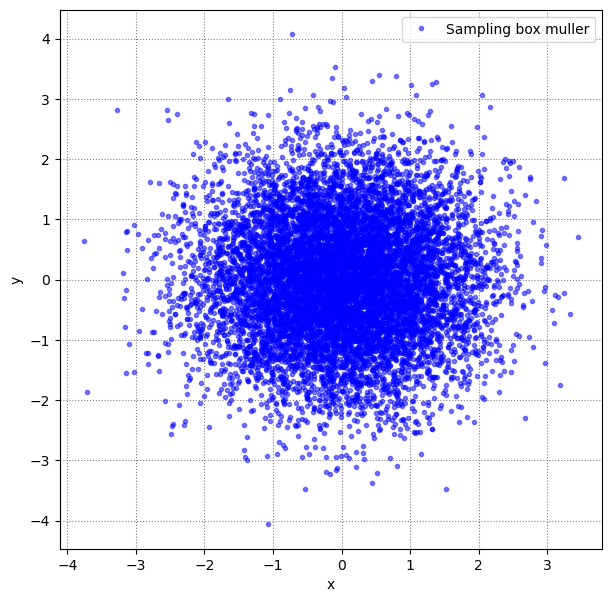

In [17]:
x = np.loadtxt("sampl_gauss_X.txt")
y = np.loadtxt("sampl_gauss_Y.txt")

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Sampling box muller', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

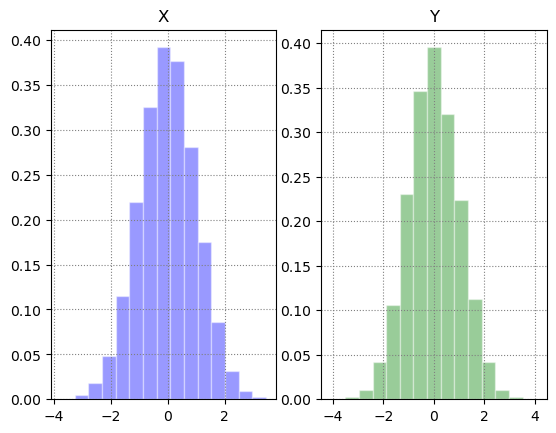

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(x, bins=15, color='blue', density=True, edgecolor='white', alpha = 0.4)
ax1.set_title("X")
ax1.grid(color='grey', linestyle ='dotted')
temp = ax2.hist(y, bins=15, color='green', density=True, edgecolor='white', alpha = 0.4)
ax2.set_title("Y")
ax2.grid(color='grey', linestyle ='dotted')
plt.show()

One can extend the algorithm to sample from $\mathcal{N}(\mu, \sigma ^2)$:
$$
\mathcal{N}(x, y) = \frac{1}{{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2} \left( (x - \mu_x)^2 + (y - \mu_y)^2 \right) \right) \, dx \, dy
$$

$$
x =  \sqrt{- 2 Ln{(1-u_1)}} cos(2\pi u_2 )\sigma + \mu \\
y =  \sqrt{- 2 Ln{(1-u_1)}} sin(2\pi u_2 )\sigma + \mu
$$

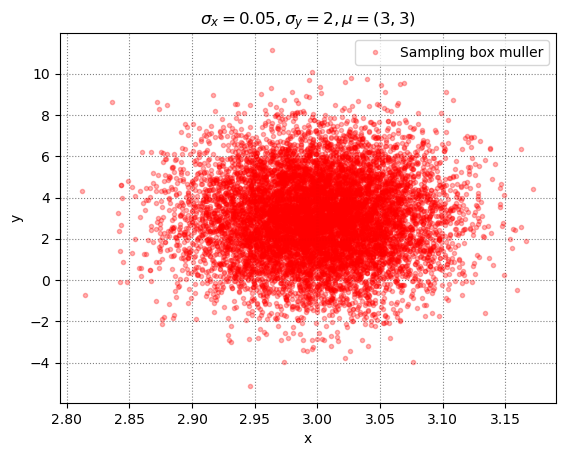

In [19]:
x = np.loadtxt("sampl_gauss_X.txt")
y = np.loadtxt("sampl_gauss_Y.txt")

#transformation
sigma_x = 0.05
sigma_y = 2
mean = 3
x = sigma_x*x + mean
y = sigma_y*y + mean

plt.title(r'$ \sigma_x=0.05, \sigma_y=2, \mu = (3,3)$')
plt.plot(x,y, '.', label = 'Sampling box muller', color = 'red', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

# 2.3 Rejection method
We want to use the rejection method to generate random numbers that are distributed according to the pdf:
$$
f(x) = \sqrt{\frac{2}{\pi}} e^{-x^2} .
$$

We define a second pdf $g(x)$ from which we can easily generate random numbers and such that $f(x) \leq c g(x)$, $\forall x$ where $c > 1$ is a
constant. The density g will be referred to as the “candidate density” and f will be the “target density".

To facilitate sampling, we can define the function g(x) in the following manner:

$$
g(x, p, \sigma) = 
\left\{ 
\begin{array}{ll} 
A  \quad\quad \text{if } x \leq p \\
A/p \cdot x e^{x^2 - p^2}\quad\quad \text{if } x > p
\end{array}\right.
$$

To sample from $g(x)$ we compute the cumulative:
$$
G(t) = 
\left\{ 
\begin{array}{ll} 
At  \quad\quad \text{if } t \leq p \\
1- A/(2p) exp(p^2 - t^2)\quad\quad \text{if } t > p
\end{array}\right.
$$

<br>

From inverse transfrom method, to generate a sample $X$ from $g(x)$: 
- $X = u/A$ if $u  \leq pA$
- $X = \sqrt{(p^2 - log(2(1-u)p/A))}$ for $u > pA$

###### The algorithm proceeds through the following steps:


1. Generate a random variable X from the distribution g(x) using inverse tranform method
$$
\quad
$$
2. generate a uniform random number U in the interval [0, 1];
$$
\quad
$$
3. if $U \geq f(x) / c g(X)$, return to step 1 and obtain new values for X and U. Otherwise, save the value of X.

##### Normalization constant and choiche of c
Let us normalize the function $g(x)$:
$$
 \int_0^p A \, dx + \int_p^{\infty }  \frac {A  x  e^{p^2 - x^2}} {p} \, dx = Ap + \frac{A}{2p} \overset{!}{=} 1
\to  A = \frac {2  p} {2  p^2 + 1}
$$

In general a good choiche for $c$ is $c=\sqrt{2/\pi}/A$.
In that way we satisfy the condition $f(x) \leq c g(x)$, $\forall x$ where $c > 1$.


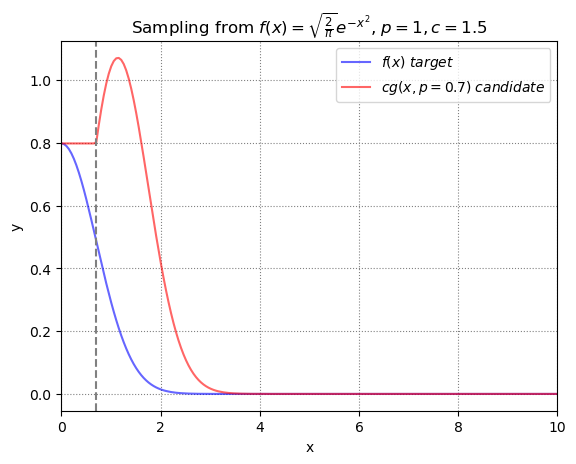

In [20]:
def f(x):
    return np.sqrt(2.0 / np.pi)* np.exp(-x**2)

def g(x, A, p):
    r = np.where(x <= p, A, A/p*x*np.exp(-((x - p)**2)))
    return r

p = 0.7
A = 2.0*p/(2.0*p*p + 1)
x = np.linspace(0, 10, 200)

y_target = f(x)
y_candidate = g(x, A, p)

c = np.max(f(x)/g(x, A, p))

plt.plot(x, y_target, '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.plot(x, c*y_candidate, '-', label=r'$c g(x,p=0.7)$ $ candidate$', color='red', alpha=0.6)  # Updated the label for g(x)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.grid(color='grey', linestyle='dotted')
plt.title(r'Sampling from $f(x) = \sqrt{\frac{2}{\pi}} e^{-x^2} $, $p=1, c=1.5$')
plt.axvline(x=p, color='grey', linestyle='--')
plt.legend()
plt.show()

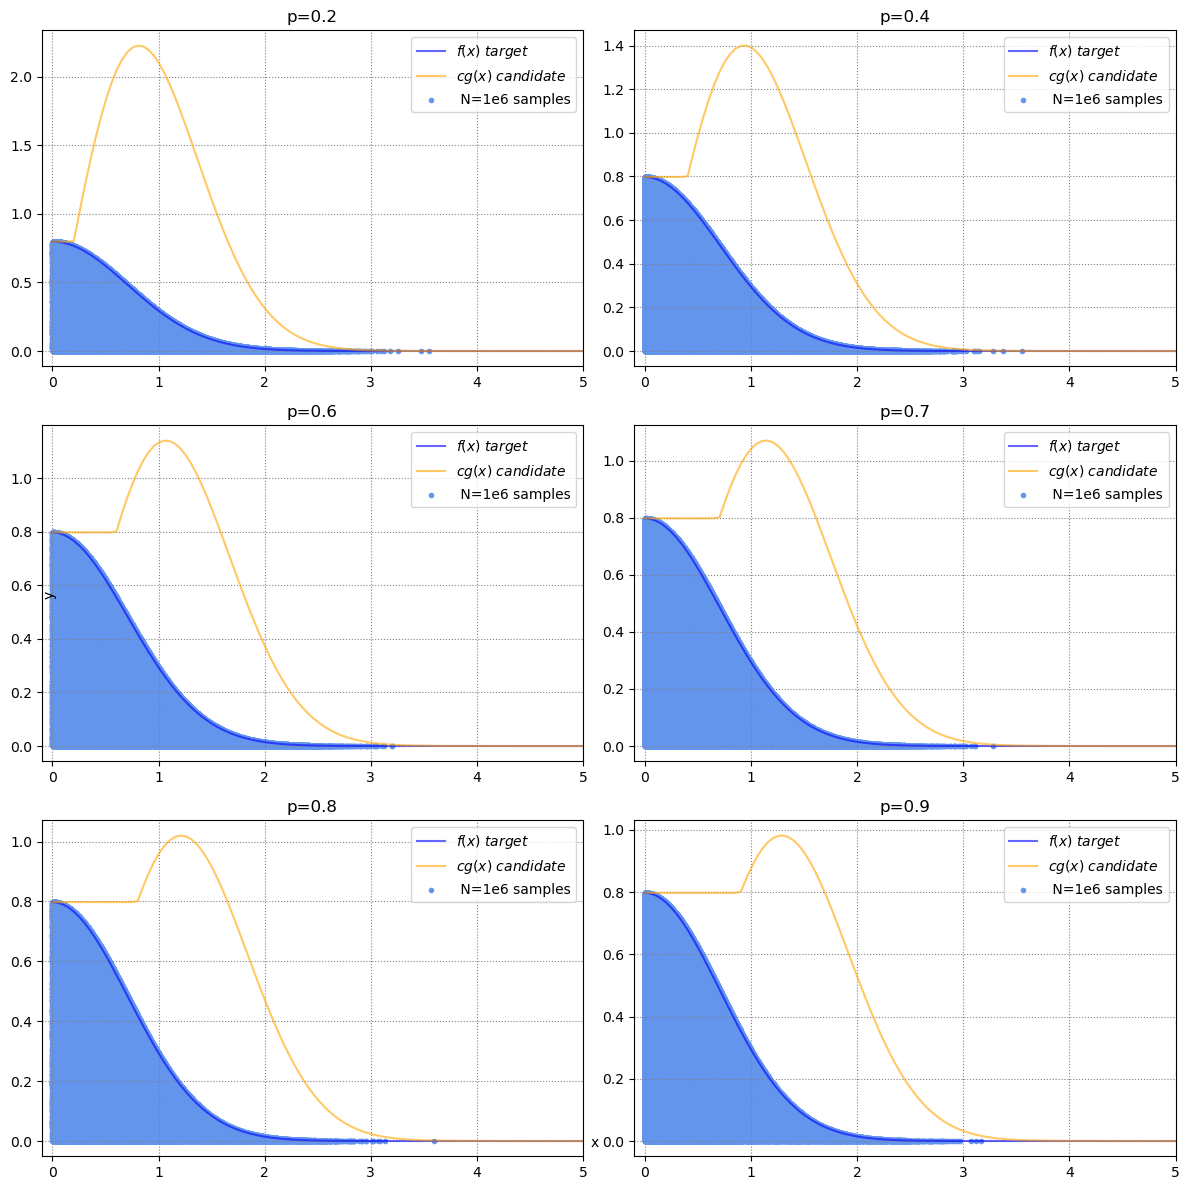

Acceptance rate for sampl_rejection_p02.txt: 0.344022
Acceptance rate for sampl_rejection_p04.txt: 0.554949
Acceptance rate for sampl_rejection_p06.txt: 0.639212
Acceptance rate for sampl_rejection_p07.txt: 0.656446
Acceptance rate for sampl_rejection_p08.txt: 0.664226
Acceptance rate for sampl_rejection_p09.txt: 0.664164


In [22]:
import os

base_dir = '/home/gloria/Scrivania/Numerical methods soft matter/00_ALL EXERCISES_EXAM/PROF. ORLANDINI/chapters 1,2,3/data/'

file_list = ['sampl_rejection_p02.txt','sampl_rejection_p04.txt','sampl_rejection_p06.txt',
            'sampl_rejection_p07.txt','sampl_rejection_p08.txt','sampl_rejection_p09.txt']
p_list = [0.2,0.4,0.6,0.7,0.8,0.9]

fig, axes = plt.subplots(nrows=len(file_list) // 2 + len(file_list) % 2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

acceptance_rates = {}
for idx, file_name in enumerate(file_list):
    
    data = np.loadtxt(os.path.join(base_dir, file_name))
    
    # Calculate acceptance rate
    acceptance_rate = data.shape[0] / 1e6
    acceptance_rates[file_name] = acceptance_rate

    p = p_list[idx]
    A = 2.0*p/(2.0*p*p + 1)
    c = np.sqrt(2./np.pi)/A;
    x = np.linspace(0, 10, 200)
    y_target = f(x)
    y_candidate = g(x, A, p)

    # Plot
    axes[idx].plot(x, y_target, '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
    axes[idx].plot(x, c*y_candidate, '-', label=r'$cg(x)$ $candidate$', color='orange', alpha=0.6)
    axes[idx].scatter(data[:,0], data[:,1],marker='.', c = 'cornflowerblue', label=' N=1e6 samples')
    axes[idx].set_title(f'p={p}')
    axes[idx].set_xlim(-0.1, 5)
    axes[idx].grid(color='grey', linestyle='dotted')
    axes[idx].legend()

# Remove any empty subplots
for i in range(len(file_list), len(axes)):
    fig.delaxes(axes[i])

# Add common labels
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical')

# Show plot
plt.tight_layout()
plt.show()

# Print acceptance rates
for file_name, rate in acceptance_rates.items():
    print(f"Acceptance rate for {file_name}: {rate}")

# 3 Importance sampling

Importance sampling is a methodology to approximate integrals of the form $I = E[f(x);p] = \int f(x)p(x)dx $ where $p(x)$ is a probability density function. The basic idea of importance sampling is to sample the states from a different distribution to lower the variance of the estimation of $E[f(x);p]$, or when sampling from $p$ is difficult (because it cannot be easily normalized) or because sampling from $p$ is inefficient.

## 3.1 Exercise 

Let us consider the following function $f(x) = e^x g(x) $ in $[0, \infty]$ where $ g(x) $ is a slowly varying function (meaning a function that changes relatively slowly compared to some other parameter). Compute the integral both with the crude method and by using the importance sampling technique.


We choose as slowly varying function $g(x)$, the logarithm function $g(x) = \ln{x}$. To show why $ \ln{x} $ is slowly varying, we consider the defition and compute the limit:

$$
\lim_{{x \to \infty}} \frac{\ln{ax}}{\ln{x}}
$$

where $a > 0$ is constant. We want to show that this limit is equal to 1 for all $a$:
$$
\lim_{{x \to \infty}} \frac{\ln{ax}}{\ln{x}} = \lim_{{x \to \infty}} \frac{\ln{a} + \ln{x}}{\ln{x}} =1
$$

Therefore, $ \ln{x} $ is a slowly varying function. 

#### Crude Monte Carlo method
the Crude Monte Carlo method to compute an integral of the form $\int_{a}^{b} f(x)$ is:
$$
I_N = \frac{b-a}{N} \sum_{i=1}^{N}  f_i 
$$
where $x$ is a random number $x \in [a, b]$ and $fi = f (x_i)$.

#### Importance sampling
For importance sampling method we use a Gaussian random number generator with $p$ the importance density $ W(x) = \sqrt{ \frac{2}{\pi}} e^{-x^2} $. With this choice one has
$$
I = \frac{1}{N} \int_{0}^{N} f(x) \approx \frac{1}{N} \sum_{i = 1}^{N} \frac{f(x_i)}{W(x_i)} \approx \sqrt{ \frac{\pi}{2}} \sum_{i=1}^{N} \frac{g(x_i)}{N}
$$
where $x_i$ is sampled from $ W(x)$ so it can be seen as a gaussian random number with $\mu = 0$ and $\sigma^2 = \frac{1}{2}$, if $x \geq 0$ . The normalization constant is $\sqrt{ \frac{\pi}{4}}$, so:

$$
I \approx \sqrt{ \frac{\pi}{4}} \sum_{i=1}^{N} \frac{g(\mathcal N(0,1/2))}{N}
$$


Finally we obtain the following results for $N = 1e7$:<br>
- The analytical integral estimation is:$-0.870058$;<br>
- The integral estimation with crude Monte Carlo is: $-0.83833$;<br>
- The integral estimation with Importance Sampling is: $-0.870102$.<br>


## 3.2 Exercise 
In this exercise we want to estimate the integral of $\int_0^{\frac{\pi}{2}} \cos(x) dx$ using importance sampling with the weight function $g(x) \propto a + bx^2$. In order to to that, we need to find the optimal values of the parameters $a$ and $b$ and to determine the number of iterations needed to achieve a 1% accuracy.


#### Proposal function g(x)
$$\int_0^{\frac{\pi}{2}} \cos(x) dx = \int_0^{\frac{\pi}{2}} \frac{\cos(x)}{g(x)} g(x) dx$$

In this case, we are considering $g(x) \propto a + bx^2$. To make it a proper probability density function, we normalize it:

$$\int_0^{\frac{\pi}{2}} \frac{1}{Z} (a + bx^2) dx = 1$$

$$Z = \int_0^{\frac{\pi}{2}} (a + bx^2) dx$$

At this point, the first step to take is to cleverly determine the values of a and b (coefficients of  g(x)) in such a way that, during the importance sampling algorithm, the part contributing the most to the integral is sampled more frequently. In our case, the region of interest for $\int_0^{\frac{\pi}{2}} \cos(x) dx$ is located in the first half of the curve:
<img src="fx.png" style="height:250px" />

Following this reasoning, a good choice of the proposal function is $g(a = 1, b = -0.5, x)$, for which the maximum is indeed in zero.

#### Importance sampling algorithm

We generate $x$ random variables from the probability density $g(x)$ to estimate the integral. In order to sample from g(x) we use as usual the inverse transform method. Since it is challenging to invert a third-degree polynomial we use Mathematica software to do that. An alternative approach involves using Cardano's formulas. <br>
For each sampled $x$, we have to compute the corresponding weight $w(x) = \frac{\cos(x)}{g(x)}$.

The final estimation of the integral will be:
$$\int_0^{\frac{\pi}{2}} \cos(x) dx \approx \frac{1}{N} \sum_{i=1}^N w(x_i) =\frac{1}{N} \sum_{i=1}^N \frac{\cos(x)}{g(x)} \quad\quad x_i \sim g(x) $$

  where $N$ is the number of samples.

Finally we want to estimate the required number of iterations to achieve a 1% accuracy. We will assess the algorithm's performance by plotting the integral estimate as the number of samples varies and the variance as the number of samples changes.


NB: to obtain samples from the proposal distribution, I employed the inversion method. Due to the extensive computational requirements, Mathematica was utilized for this task.

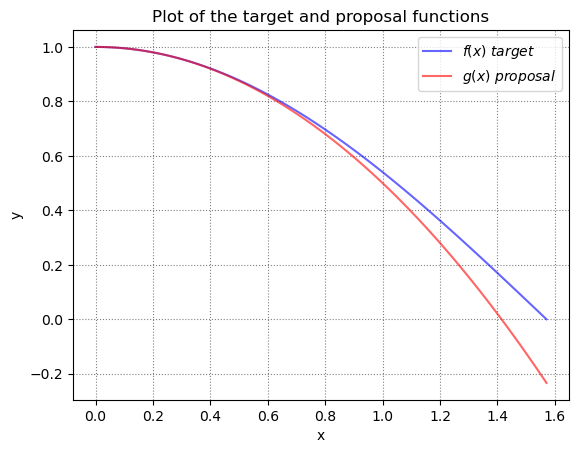

In [4]:
x = np.linspace(0,math.pi/2,100)
a=1
b=-0.5

plt.plot(x, np.cos(x), '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.plot(x, a+b*x*x, '-', label=r'$g(x)$ $ proposal$', color='red', alpha=0.6)  # Updated the label for g(x)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the target and proposal functions')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()


In [8]:
data = np.loadtxt("mean_std_N.txt")
x = data[:,0]
Mean = data[:,1]
Std = data[:,2]

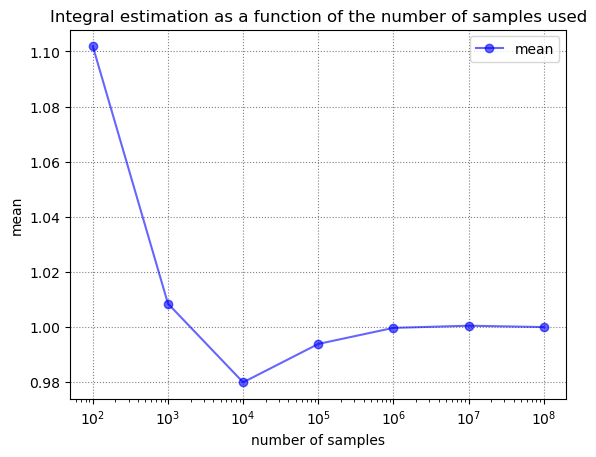

In [9]:
plt.plot(x, Mean, '-o', label='mean', color='blue', alpha=0.6)
plt.xlabel('number of samples')
plt.ylabel('mean')
plt.xscale('log')
plt.title('Integral estimation as a function of the number of samples used')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

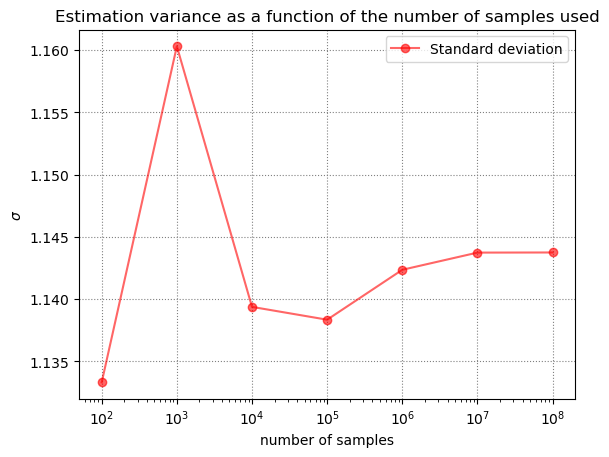

In [10]:
plt.plot(x, Std, 'o-', label='Standard deviation', color='red', alpha=0.6)  
plt.xlabel('number of samples')
plt.ylabel(r'$\sigma$')
plt.xscale('log')
plt.title('Estimation variance as a function of the number of samples used')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

As the number of samples increases, the estimation of the integral using importance sampling gradually converges towards a value that coincides with the analytical result of the integral, and the variance stabilizes.

To determine the number of samples that guarantees $1 \%$ accuracy, we need to calculate the error of each estimate compared to the analytical value (which is $1$ in this case):

$$
E = \left| \frac{{\text{{estimate}} - \text{{analytical value}}}}{{\text{{analytical value}}}} \right| \times 100 $$

Let's calculate the errors for each estimate:

In [34]:
# compute accuracy of the integral with importance sampling
print('The accuracy for each estimate with importance sampling is: \n')
for i, N_samples in enumerate(x):
    error = abs((Mean[i] - 1) / 1) * 100
    print(f"N_samples = {N_samples}: {error:.5f}%")

The accuracy for each estimate with importance sampling is: 

N_samples = 100.0: 10.18600%
N_samples = 1000.0: 0.84400%
N_samples = 10000.0: 2.01200%
N_samples = 100000.0: 0.61890%
N_samples = 1000000.0: 0.03520%
N_samples = 10000000.0: 0.04300%
N_samples = 100000000.0: 0.00610%


## 3.3 Exercise 

Let us consider the function $f (x)$ defined as:

$$
f(x) = 
\left\{ 
\begin{array}{ll} 
0  \quad\quad \text{if } x < T \\
1  \quad\quad \text{if } x \geq T
\end{array}\right.
$$
and compute $\int_{\mathcal{R}} f(x) \rho(x) dx$ with respect to the PDF $\rho(x) = e^{−x}$ defined for $x \geq 0.$

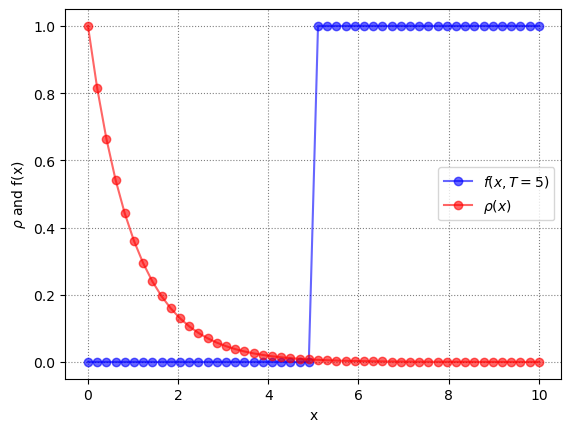

In [11]:
def f(x, T):
    r = np.where(x <= T, 0, 1)
    return r

x = np.linspace(0,10,50)
plt.plot(x, f(x,5), 'o-', label=r'$f(x,T=5)$', color='blue', alpha=0.6)  
plt.plot(x, np.exp(-x), 'o-', label=r'$\rho(x)$', color='red', alpha=0.6)  
plt.xlabel('x')
plt.ylabel(r'$\rho$ and f(x)')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

The PDF $\rho(x)$ is very high in the region where $x \geq T$. This means that most values x sampled according to $\rho(x)$ will be zero. On the other hand $f (x) = 1$ for $x > T (= 5)$ where the $\rho(x)$ is very small. We can try to get an estimate of $⟨f⟩_\rho$ via importance sampling. <br>
Consider the function $g(a, x) = a \cdot e^{-ax}$ defined for $x \geq 0$ and for $0 < a \leq 1$, where $a$ is the parameter to optimize according to a minimum variance principle.

##### Expected value of  $⟨f⟩_\rho$, $\sigma ^2⟨f⟩_\rho$ and $\sigma^2(a, f(x)\rho(x)/g(a, x))$

To compute the integral $\int_{\mathcal{R}} f(x) \rho(x) \, dx$ with respect to the PDF $\rho(x) = e^{-x}$ we need to split the integral into two parts based on the definition of $f(x)$:

$$
 ⟨f⟩_\rho= \int_{\mathcal{R}} f(x) \rho(x) \, dx = \int_{0}^{T} 0 \cdot e^{-x} \, dx + \int_{T}^{\infty} 1 \cdot e^{-x} \, dx
$$

Now, let's compute these two integrals step by step:

$$
\int_{0}^{T} 0 \cdot e^{-x} \, dx = 0
$$

$$
\int_{T}^{\infty} 1 \cdot e^{-x} \, dx = \int_{\infty}^{T} - e^{-x} \, dx =  \left[e^{-x}\right]_{\infty}^{T} = e^{-T} - e^{-\infty} = e^{-T}
$$


To compute the variance of the function $f$, considering the random variable $x \sim \rho(x) = e^{-x}$, we have to calculate this integral:

$$
\sigma^2(f) = \int (f(x) - ⟨f⟩_\rho)^2 \rho(x) \, dx
$$



In our case, we have: 

$$
\sigma^2(f) = \int (f(x) - ⟨f⟩_\rho)^2 \rho(x) \, dx = \int(f(x)^2 + ⟨f⟩_\rho^2 - 2f(x)⟨f⟩_\rho) \rho(x) \, dx = \\
\int f(x)\rho(x) \, dx + \int ⟨f⟩_\rho^2 \rho(x) \, dx - 2⟨f⟩_\rho \int f(x) \rho(x) \, dx = 
⟨f⟩_\rho + ⟨f⟩_\rho^2 - 2⟨f⟩_\rho^2 = ⟨f⟩_\rho (1-⟨f⟩_\rho)
$$


To compute $\sigma^2(a, f(x)\rho(x)/g(a, x))$: 

$
\begin{align*}
\sigma^2((a, f(x)\rho(x)/g(a, x))  = ⟨\frac{f(x)^2\rho(x)^2}{g(a, x)^2}⟩_{g(x)} -  ⟨\frac{f(x)\rho(x)}{g(a, x)}⟩^2_{g(x)} &= \\
\int_{\mathcal{R}}\frac{f(x)^2\rho(x)^2}{g(a, x)^2}  g(a, x) dx -  ⟨f(x)⟩^2_{\rho(x)} &= \\
\int_{\mathcal{R}}\frac{f(x)^2\rho(x)^2}{g(a, x)^2}  g(a, x) dx - e^{-2T} &= \\
\int_{T}^{\infty}\frac{e^{-2x}}{ae^{-ax}} dx - e^{-2T} &= \\
\int_{T}^{\infty}\frac{e^{x(a-2)}}{a} dx - e^{-2T} &= \\
\frac{1}{a(a-2)} \left[ e^{-x(-a+2)}\right]_{T}^{\infty} - e^{-2T} &= \\
\frac{e^{-T(2-a)}}{a(a-2)}- e^{-2T}
\end{align*}
$

##### importance sampling estimation

$$\int_0^{\infty} f(x)\rho(x) dx \approx \frac{1}{N} \sum_{i=1}^N w(x_i) =\frac{1}{N} \sum_{i=1}^N \frac{f(x)\rho(x)}{g(x)} \quad\quad x_i \sim g(x) $$


##### A - Find the best parameter a for g(x,a)
The first thing to do is to find the value of $a, a^∗$ such that the variance $\sigma^2(a, f(x)\rho(x)/g(a, x))$ is minimum. To do that we set up a simulation using the importance sampling method with T=5 and a sample size of 1e7 and we perform multiple runs, each time varying the parameter $a \in (0,1)$ in the candidate density. For each run, we compute the mean and variance of the resulting sequence.

$\textbf{Intuition}$ Before proceeding with the simulation, we try to understand the behavior of the variance as the parameter a varies. To achieve this, we plot the target function $f(x)$ against the candidate function $g(x, a)$, incorporating an interactive slider to observe the effects of varying $a$. Notably, as $a$ decreases, the candidate density becomes more skewed, exhibiting non-vanishing values even in the region $x > T$. This is particularly significant as it corresponds to the region where the integral will have maximum contribution.<br>
In a more intuitive sense, we expect that, for small values of $a$, the result of the integral with importance sampling should be better.

In [2]:
from ipywidgets import interact
def f(x, T):
    r = np.where(x <= T, 0, 1)
    return r

def plot_function(a):
    x = np.linspace(0, 10, 100)
    y = a * np.exp(-a * x)
    plt.plot(x, y, label=f'$g(x, a={a})$')
    plt.plot(x, f(x, 5), 'o-', label=r'$f(x, T=5)$', color='blue', alpha=0.6)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Plot of {a} * e^(-{a} * x) and g(x, a={a})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive slider with interact
interact(plot_function, a=(0.1, 1, 0.1))


interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, min=0.1), Output()), _dom_classes=('wid…

<function __main__.plot_function(a)>

$\textbf{Analytical results}$ Below is plotted the function $\sigma^2(a, f(x)\rho(x)/g(a, x))$ for $T=5$ with varying $a$ between 0 and 1. As you can see, this function is very flat for values of $a$ between 0.1 and 0.2 (where the minimum is located, $a \rightarrow 0.18$ ), while for $a$ tending to 0, it diverges.

$$
\frac{\partial}{\partial a}  \sigma^2(a,\frac{ f(x)\rho(x)}{g(a, x)}) = -\frac{e^{-((2-a) T)}}{(a-2) a^2}+\frac{T e^{-((2-a) T)}}{(a-2) a}-\frac{e^{-((2-a) T)}}{(a-2)^2 a} \\
\frac{\partial}{\partial a}  \sigma^2(a,\frac{ f(x)\rho(x)}{g(a, x)}) = 0 \longrightarrow a =  \frac {-\sqrt {T^2 + 1} + T + 1} {T} = 0.180196 \quad \text{if } T=5, a \in (0,1]
$$
<img src="image_aa.png" style="height:300px"/>

$\textbf{Numerical results}$ Here we show the results of the simulations in terms of $\sigma$ vs $a$ parameter. The simulation results confirm our earlier observations: as the parameter $a$ decreases, the variance becomes lower and lower. This outcome aligns with our previous understanding, wherein a smaller $a$ leads to a candidate function that have higher values in the most important regions, particularly where $x > T$. This heightened concentration in the significant areas contributes to a reduction in variance during the importance sampling simulations.

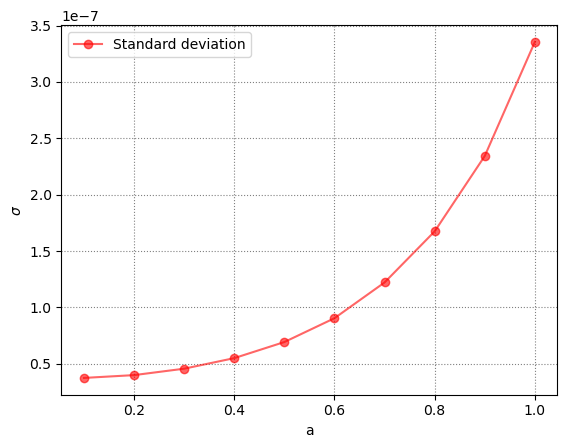

In [8]:
data_var = np.loadtxt("A_4_std_a.txt")
x = data_var[:,0]
Std = data_var[:,2]

plt.plot(x, Std, 'o-', label='Standard deviation', color='red', alpha=0.6)  
plt.xlabel('a')
plt.ylabel(r'$\sigma$')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

##### B -  Find the best T 
Now we want to understand the behave of statistical errors when parameter T varies in particular in the cases in which $T = 3, 5, 10$ and $20$, where T is the parameter of the target density $f(x)$.  We run simulations with the best value of the parameter $a$, a number of samples $1e7$ and varying $T$. We plot the values of $\sigma^2(a, f(x, T)\rho(x)/g(a, x))$ vs $T$. For each value of $T$ we recall that the best estimate of $a$ is:
$$
a^* = \frac {-\sqrt {T^2 + 1} + T + 1} {T}
$$


In [28]:
import pandas as pd

def sigma_f(T):
    return np.sqrt(np.exp(-T)*(1- np.exp(-T)))

def sigma_a_star(T, a):
    return np.sqrt(np.exp(-T*(2-a))/(a*(2-a)) - np.exp(-2*T))

def a_star(T):
    return min(1, ((T+1)-np.sqrt(T**2+1))/T)

def sigma_f_sigma_g(T,a):
    return sigma_f(T)/ sigma_a_star(T,a)

T = [3, 5, 10, 20]
first = [sigma_f(t)/np.exp(-t) for t in T]
second = [sigma_a_star(t,a_star(t))/np.exp(-t) for t in T]
third = [sigma_f_sigma_g(t,a_star(t)) for t in T]

df = pd.DataFrame(columns=["T", "sf", "sf_rho_g", "rapp"])
df.T = T
df.sf = first
df.sf_rho_g = second
df.rapp = third

df

,T,sf,sf_rho_g,rapp
0,3,4.368700,1.951849,2.238237
1,5,12.141382,2.551067,4.759335
2,10,148.409790,3.645225,40.713484
3,20,22026.465772,5.183706,4249.173293


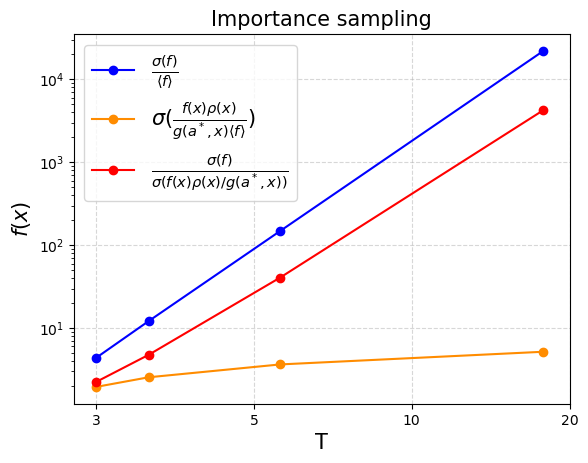

In [32]:
#plot
plt.plot(T, first, marker='o', label=r'$\frac{\sigma(f)}{\langle f \rangle}$', color='blue')
plt.plot(T, second, marker='o', label=r'$\sigma(\frac{f(x)\rho(x)}{g(a^*,x)\langle f \rangle})$', color='darkorange')
plt.plot(T, third, marker='o', label=r'$\frac{\sigma(f)}{\sigma(f(x)\rho(x)/g(a^*,x))}$', color='red')
font = {'size':15}
plt.title('Importance sampling', fontdict=font)
plt.xlabel('T', fontdict=font)
plt.ylabel(r'$f(x)$', fontdict=font)
plt.xticks(np.linspace(3, 21, 4), T)
plt.legend(prop=font)
plt.grid(alpha=0.5, ls='--')
plt.yscale('log')
plt.savefig("importance_sampling.png", dpi=300)
plt.show()

The plot shows the behaviour of the statistical errors at different T:
* notice that as T grows, the error become bigger;
* as T grows the difference between the two statostical errors grow;
* the importance sampling method leads to small errors even in case T is big.

###### Mean and Standard deviation varying the number of samples.
Now, let's perform a final simulation in which we compare the value of the integral and the standard deviation for the crude Monte Carlo method versus importance sampling, varying the number of samples.<br>
Set $T = 3$ and $a = 0.18$, which are the values that have yielded the best results in minimizing the standard deviation.

In [47]:
data = np.loadtxt("A_4_mean_std_N.txt")
data_mc = np.loadtxt("A_4_MC_mean_std_N.txt")
x = data[:,0]
Mean = data[:,1]
Std = data[:,2]

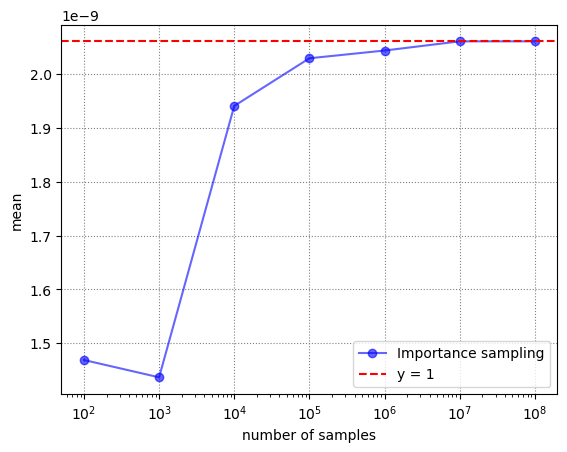

In [48]:
plt.plot(x, Mean, '-o', label='Importance sampling', color='blue', alpha=0.6)
plt.xlabel('number of samples')
plt.ylabel('mean')
plt.xscale('log')
plt.grid(color='grey', linestyle='dotted')
plt.axhline(y=np.exp(-20), color='red', linestyle='--', label="y = 1")
plt.legend()
plt.show()

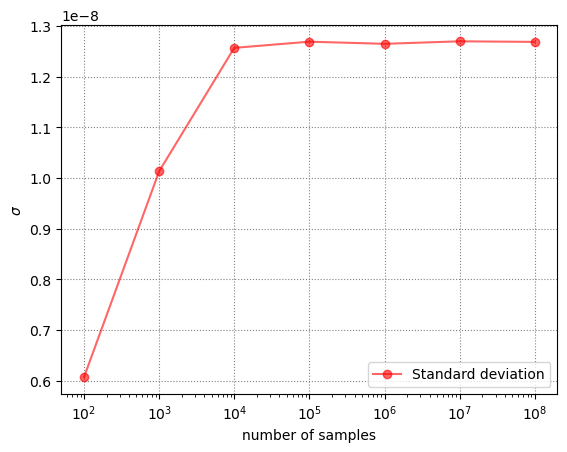

In [49]:
plt.plot(x, Std, 'o-', label='Standard deviation', color='red', alpha=0.6)  
plt.xlabel('number of samples')
plt.ylabel(r'$\sigma$')
plt.xscale('log')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

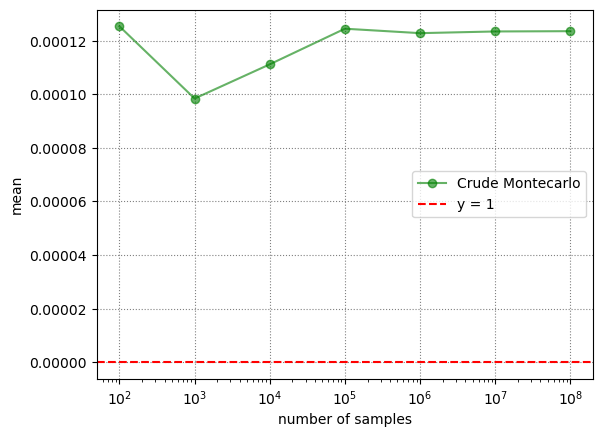

In [50]:
plt.plot(data_mc[:,0], data_mc[:,1], '-o', label='Crude Montecarlo', color='green', alpha=0.6)
plt.xlabel('number of samples')
plt.ylabel('mean')
plt.xscale('log')
plt.grid(color='grey', linestyle='dotted')
plt.axhline(y=np.exp(-20), color='red', linestyle='--', label="y = 1")
plt.legend()
plt.show()